In [335]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [336]:
df = pd.read_excel('./Prediction-de-Prets-Immobiliers.xlsx')

In [337]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 14
0,NaN,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,NaN,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,NaN
2,NaN,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,NaN
3,NaN,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,NaN
4,NaN,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,NaN


In [338]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Unnamed: 14'],
      dtype='object')

In [339]:
df.drop(['Unnamed: 0','Unnamed: 14'],axis=1,inplace=True)

In [340]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.7+ KB


In [342]:
df.isnull().sum()

Loan_ID               2
Gender               15
Married               5
Dependents           17
Education             2
Self_Employed        34
ApplicantIncome       2
CoapplicantIncome     2
LoanAmount           24
Loan_Amount_Term     16
Credit_History       52
Property_Area         2
Loan_Status           2
dtype: int64

In [343]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'])

In [344]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [345]:
df.Credit_History.fillna(0,inplace=True)

In [346]:
df.dropna(axis=0,inplace=True)

In [347]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

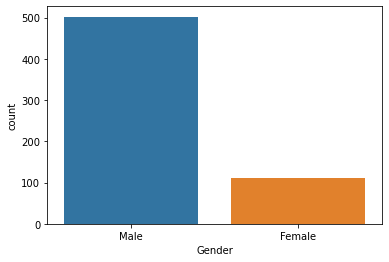

In [348]:
# categorical attributes visualization
sns.countplot(df['Gender'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

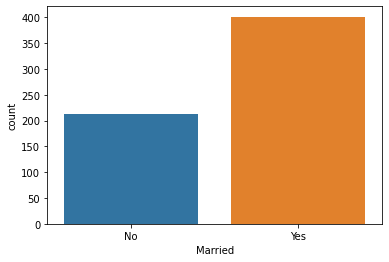

In [349]:
sns.countplot(df['Married'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

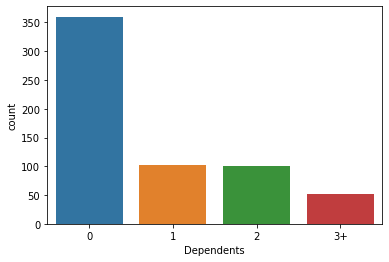

In [350]:
sns.countplot(df['Dependents'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

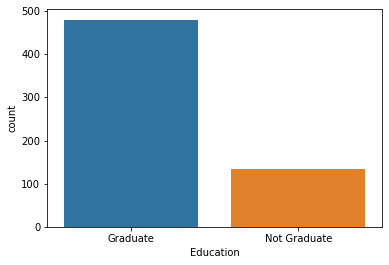

In [351]:
sns.countplot(df['Education'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

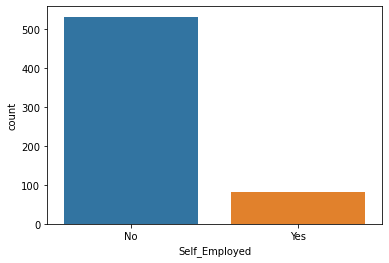

In [352]:
sns.countplot(df['Self_Employed'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

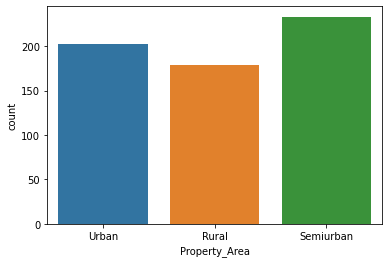

In [353]:
sns.countplot(df['Property_Area'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

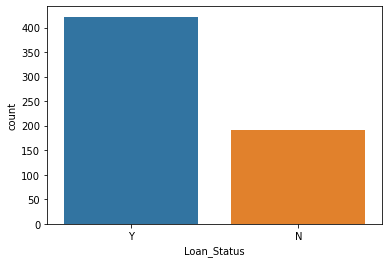

In [354]:
sns.countplot(df['Loan_Status'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

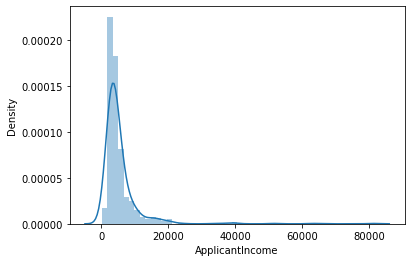

In [355]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

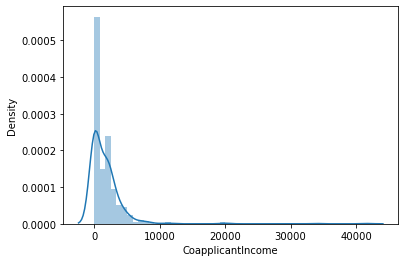

In [356]:
sns.distplot(df["CoapplicantIncome"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

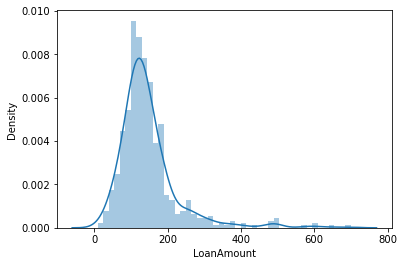

In [357]:
sns.distplot(df["LoanAmount"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

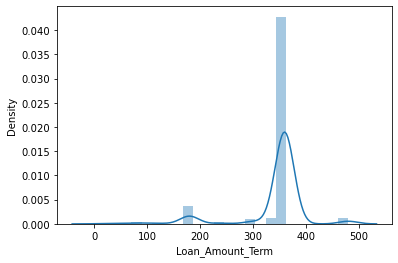

In [358]:
sns.distplot(df['Loan_Amount_Term'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

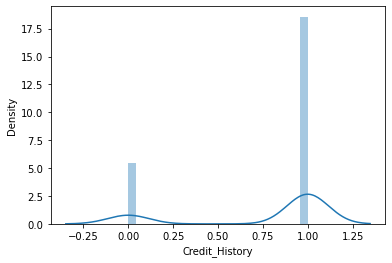

In [359]:
sns.distplot(df['Credit_History'])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

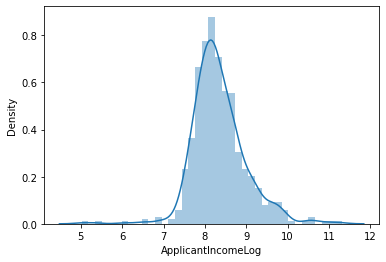

In [360]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

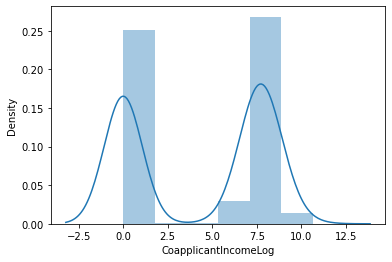

In [361]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

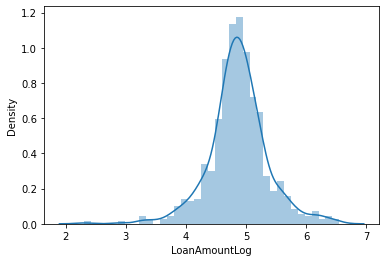

In [362]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

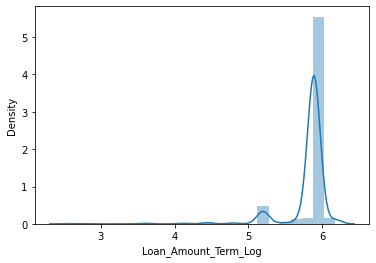

In [363]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:>

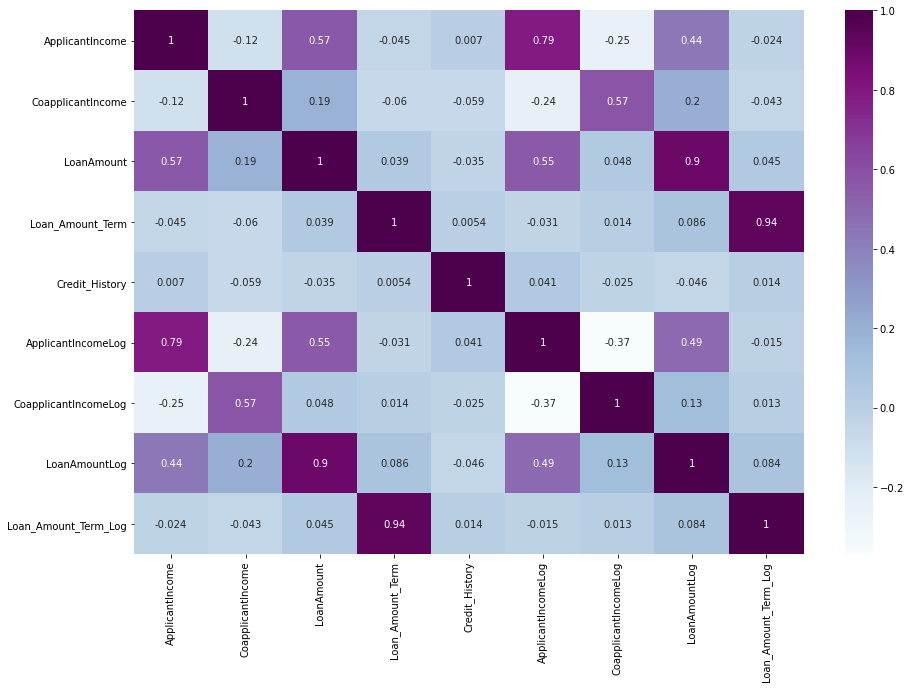

In [364]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [365]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878


In [366]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


In [367]:
df['Dependents'] = df['Dependents'].map({"3+":3,0:0,1:1,2:2})
df[['Dependents']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dependents  614 non-null    int64
dtypes: int64(1)
memory usage: 25.8 KB


In [368]:
def save_variable(var,col):
    with open(col+'.pickle','wb') as f : 
        pickle.dump(var,f)

In [369]:
def enc(col,df=df):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    save_variable(le,col)

In [370]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status"]
for col in cols:
    enc(col)


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int32  
 1   Married               614 non-null    int32  
 2   Dependents            614 non-null    int64  
 3   Education             614 non-null    int32  
 4   Self_Employed         614 non-null    int32  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
dtypes: float64(4), int32(6), int64(1)
memory usage: 59.3 KB


In [372]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


In [373]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [374]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [375]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [376]:
df.isna().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncomeLog      0
LoanAmountLog           0
Loan_Amount_Term_Log    0
dtype: int64

In [377]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1, X, y)

Accuracy is 75.97402597402598
Cross validation is 77.20378515260563


In [378]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2, X, y)

Accuracy is 72.07792207792207
Cross validation is 67.75156604025057


In [379]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model3 = RandomForestClassifier()
classify(model3, X, y)

Accuracy is 75.32467532467533
Cross validation is 74.59816073570572


In [380]:
model4 = ExtraTreesClassifier()
classify(model4, X, y)

Accuracy is 72.07792207792207
Cross validation is 71.8286018925763


In [381]:
model5 = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model5, X, y)

Accuracy is 68.83116883116884
Cross validation is 71.98320671731308


In [382]:
model6 = RandomForestClassifier()
model6.fit(x_train, y_train)

RandomForestClassifier()

In [383]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27, 27],
       [10, 90]], dtype=int64)

<AxesSubplot:>

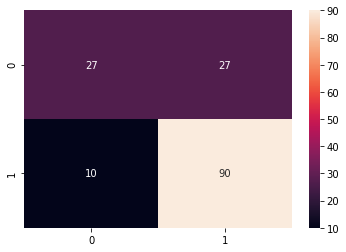

In [384]:
sns.heatmap(cm, annot=True)

In [385]:
save_variable(model1,'model')